In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/genres_v2.csv')
# df = df[['name','album','artist','id','release_date','popularity','danceability','energy','valence','loudness']]
# df = df[[ 'id', 'song_name', 'danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
df = df[[ 'id', 'song_name', 'danceability','energy','liveness']]

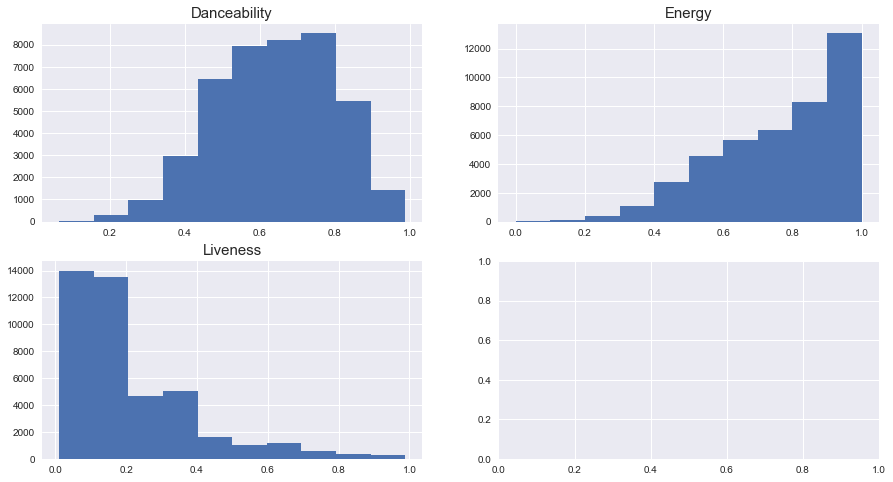

In [14]:
fig,axes = plt.subplots(2,2,figsize=(15, 8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['liveness'])
axes[1,0].set_title('Liveness',fontsize=15)


plt.show()

In [4]:
df.describe()

,danceability,energy,liveness
count,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,0.214079
std,0.156617,0.183823,0.175576
min,0.065100,0.000243,0.010700
25%,0.524000,0.632000,0.099600
50%,0.646000,0.803000,0.135000
75%,0.766000,0.923000,0.294000
max,0.988000,1.000000,0.988000


In [5]:
df

,id,song_name,danceability,energy,liveness
0,2Vc6NJ9PW9gD9q343XFRKx,Mercury: Retrograde,0.831,0.814,0.0556
1,7pgJBLVz5VmnL7uGHmRj6p,Pathology,0.719,0.493,0.1180
2,0vSWgAlfpye0WCGeNmuNhy,Symbiote,0.850,0.893,0.3720
3,0VSXnJqQkwuH2ei1nOQ1nu,ProductOfDrugs (Prod. The Virus and Antidote),0.476,0.781,0.1140
4,4jCeguq9rMTlbMmPHuO7S3,Venom,0.798,0.624,0.1660
...,...,...,...,...,...
42300,46bXU7Sgj7104ZoXxzz9tM,NaN,0.528,0.693,0.1210
42301,0he2ViGMUO3ajKTxLOfWVT,NaN,0.517,0.768,0.2050
42302,72DAt9Lbpy9EUS29OzQLob,NaN,0.361,0.821,0.3850
42303,6HXgExFVuE1c3cq9QjFCcU,NaN,0.477,0.921,0.0575


In [6]:
col_features = df.columns[2:]
# col_features
X = MinMaxScaler().fit_transform(df[col_features])

In [7]:
col_features

Index(['danceability', 'energy', 'liveness'], dtype='object')

In [8]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [9]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

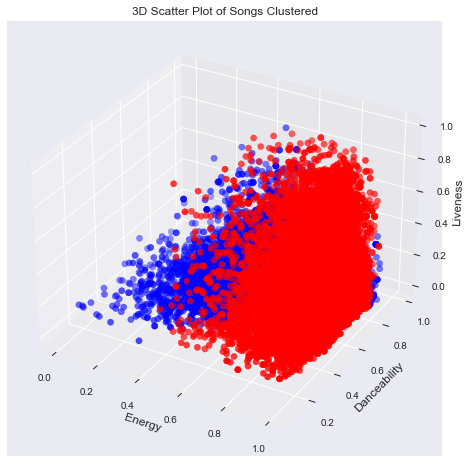

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['liveness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Liveness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [11]:
df.groupby(['kmeans']).mean()

,danceability,energy,liveness
kmeans,,,
0,0.736744,0.631839,0.142597
1,0.545079,0.889039,0.283290


In [12]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

In [13]:
cluster_0.to_csv("data/cluster0.csv",index=False)
cluster_1.to_csv("data/cluster1.csv",index=False)
df.to_csv("data/df.csv",index=False)